In [1]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
khsw = web.DataReader('002022.SZ', 'yahoo', '2010/1', '2015/11/10')

In [3]:
khsw.head

<bound method DataFrame.head of              Open   High    Low  Close    Volume  Adj Close
Date                                                       
2010-01-11  20.65  20.99  20.00  20.11   6885000      18.21
2010-01-12  20.29  20.95  20.02  20.91   8525300      18.93
2010-01-13  20.80  21.15  20.36  20.73   9991000      18.77
2010-01-14  20.66  21.73  20.66  21.42   9837300      19.40
2010-01-15  21.56  22.14  21.55  21.98  11486400      19.90
...           ...    ...    ...    ...       ...        ...
2015-11-03  25.05  25.44  24.55  25.10  15916000      25.10
2015-11-04  26.00  27.20  25.70  27.15  29450600      27.15
2015-11-05  27.23  27.52  26.50  27.36  34191800      27.36
2015-11-06  27.20  28.97  27.20  28.69  33893500      28.69
2015-11-09  28.50  30.66  28.26  29.21  37536400      29.21

[1486 rows x 6 columns]>

In [4]:
khsw['long_ma']=pd.rolling_mean(khsw['Adj Close'], 120)

In [5]:
khsw['long_ma'].tail()

Date
2015-11-03    32.18
2015-11-04    32.05
2015-11-05    31.92
2015-11-06    31.80
2015-11-09    31.69
Name: long_ma, dtype: float64

In [6]:
khsw['short_ma'] = pd.rolling_mean(khsw['Adj Close'], 30)
khsw['short_ma'].tail()
khsw['change'] = khsw['Adj Close'].pct_change()

In [7]:
vkhsw = khsw[120:].copy()
vkhsw.head


<bound method DataFrame.head of              Open   High    Low   ...    long_ma  short_ma  change
Date                              ...                             
2010-07-07  14.57  14.59  14.05   ...      19.59     15.16   -0.01
2010-07-08  14.30  14.95  14.08   ...      19.55     14.96    0.00
2010-07-09  14.40  14.88  14.21   ...      19.50     14.76    0.01
2010-07-12  14.59  14.95  14.59   ...      19.45     14.57    0.00
2010-07-13  14.77  14.77  14.00   ...      19.39     14.47   -0.04
...           ...    ...    ...   ...        ...       ...     ...
2015-11-03  25.05  25.44  24.55   ...      32.18     24.13    0.00
2015-11-04  26.00  27.20  25.70   ...      32.05     24.28    0.08
2015-11-05  27.23  27.52  26.50   ...      31.92     24.43    0.01
2015-11-06  27.20  28.97  27.20   ...      31.80     24.68    0.05
2015-11-09  28.50  30.66  28.26   ...      31.69     24.94    0.02

[1366 rows x 9 columns]>

In [8]:
vkhsw['sig']=0

In [9]:
vkhsw.loc[vkhsw.short_ma > vkhsw.long_ma, 'sig']= 1

In [10]:
vkhsw.loc[vkhsw.sig==1]

             Open   High    Low ...   short_ma  change  sig
Date                            ...                        
2010-10-29  17.23  17.40  16.72 ...      15.33    0.02    1
2010-11-01  17.48  17.77  17.30 ...      15.34    0.01    1
2010-11-02  17.60  17.77  17.21 ...      15.33   -0.02    1
2010-11-03  17.21  17.32  16.80 ...      15.29   -0.02    1
2010-11-04  16.93  17.50  16.91 ...      15.27    0.03    1
...           ...    ...    ... ...        ...     ...  ...
2015-07-23  37.00  38.47  36.57 ...      39.77    0.03    1
2015-07-24  38.19  40.99  37.56 ...      39.06    0.02    1
2015-07-27  38.00  39.24  34.92 ...      38.28   -0.10    1
2015-07-28  32.93  34.00  31.43 ...      37.53   -0.08    1
2015-07-29  32.69  33.48  29.11 ...      36.80    0.04    1

[702 rows x 10 columns]

In [14]:
vkhsw['ret'] = (vkhsw.sig*vkhsw.change + 1).cumprod()
vkhsw['norm_ret'] = (vkhsw.change +1).cumprod()

# and ax2 is in the lower row



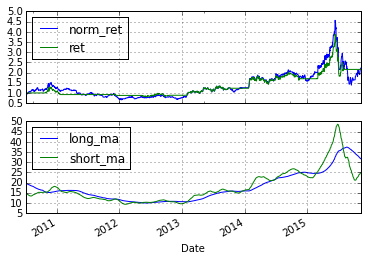

In [15]:
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

vkhsw[['norm_ret', 'ret']].plot(ax = ax1)
vkhsw[[ 'long_ma', 'short_ma']].plot(ax = ax2)

In [28]:
trans_count = vkhsw[vkhsw.sig > vkhsw.shift().sig]

In [29]:
trans_count

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2010-10-29  17.23  17.40  16.72    ...       1  1.02      1.19
2011-12-07  12.42  12.75  12.35    ...       1  0.94      0.89
2012-05-15  10.97  11.06  10.87    ...       1  0.86      0.80
2013-01-31  12.18  13.15  12.13    ...       1  0.93      0.93
2013-12-20  16.82  16.82  16.82    ...       1  1.23      1.26
2014-06-30  22.56  23.07  22.26    ...       1  1.65      1.74
2015-02-23  26.50  26.50  26.50    ...       1  1.70      2.00

[7 rows x 12 columns]

In [30]:
vkhsw['20111206': '20111208']

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2011-12-06  12.30  12.45  12.16    ...       0  0.92      0.87
2011-12-07  12.42  12.75  12.35    ...       1  0.94      0.89
2011-12-08  12.51  12.66  12.16    ...       1  0.92      0.87

[3 rows x 12 columns]

In [32]:
exit_count = vkhsw[vkhsw.sig < vkhsw.shift().sig]
exit_count

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2011-01-26  15.64  15.89  15.64    ...       0  0.92      1.09
2011-12-15  11.73  11.88  11.11    ...       0  0.88      0.81
2012-10-19  11.25  11.34  11.17    ...       0  0.89      0.81
2013-10-10  16.38  16.38  15.89    ...       0  1.23      1.20
2014-06-16  21.92  22.07  21.58    ...       0  1.62      1.64
2014-11-21  23.65  24.33  23.53    ...       0  1.70      1.83
2015-07-30  32.80  33.38  30.61    ...       0  2.16      2.33

[7 rows x 12 columns]

In [35]:
trans_idx = (trans_count + exit_count).index

In [54]:
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    print("max trading ret is {0}".format(np.max(trading_days.ret)))
    print("ending ret is {0}".format(trading_days.iloc[-1].ret))
    print('max draw down in this trading is {0:.3f}'.format(1-np.min(trading_days.norm_ret)))

max trading ret is 1.26801178784
ending ret is 0.911239187581
max draw down in this trading is 0.292
max trading ret is 0.977002847732
ending ret is 0.911975056612
max draw down in this trading is 0.067
max trading ret is 1.14350967607
ending ret is 1.02102395321
max draw down in this trading is 0.164
max trading ret is 1.43666989547
ending ret is 1.28417404855
max draw down in this trading is 0.171
max trading ret is 1.49346034919
ending ret is 1.30718662825
max draw down in this trading is 0.226
max trading ret is 1.22776549069
ending ret is 1.0516270368
max draw down in this trading is 0.198
max trading ret is 2.28301912606
ending ret is 1.16518978418
max draw down in this trading is 0.531
